<a href="https://colab.research.google.com/github/malakkazi/Cognifyz_InternshipTasks/blob/main/L3_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import seaborn as sns
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [6]:
df["Rating text"] = df["Rating text"].astype(str).str.lower()

stop_words = set(stopwords.words("english"))
df["Cleaned_Reviews"] = df["Rating text"].apply(
    lambda x: " ".join([word for word in x.split() if word not in stop_words])
)

In [7]:
positive_words = ["good", "great", "excellent", "amazing", "tasty", "love", "delicious"]
negative_words = ["bad", "poor", "terrible", "worst", "awful", "hate", "disgusting"]

positive_count = Counter(
    word for review in df["Cleaned_Reviews"] for word in review.split() if word in positive_words
)
negative_count = Counter(
    word for review in df["Cleaned_Reviews"] for word in review.split() if word in negative_words
)

print("Most Common Positive Words:", positive_count.most_common(10))
print("Most Common Negative Words:", negative_count.most_common(10))

Most Common Positive Words: [('good', 3179), ('excellent', 301)]
Most Common Negative Words: [('poor', 186)]


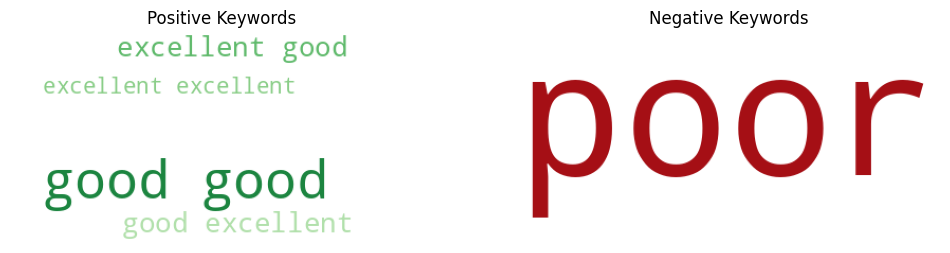

In [8]:
positive_text = " ".join([word for review in df["Cleaned_Reviews"] for word in review.split() if word in positive_words])
negative_text = " ".join([word for review in df["Cleaned_Reviews"] for word in review.split() if word in negative_words])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(background_color="white", colormap="Greens").generate(positive_text))
plt.title("Positive Keywords")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(WordCloud(background_color="white", colormap="Reds").generate(negative_text))
plt.title("Negative Keywords")
plt.axis("off")
plt.show()

In [10]:
df["Review_Length"] = df["Rating text"].apply(len)
print("Average Review Length:", df["Review_Length"].mean())

Average Review Length: 7.020730813527379


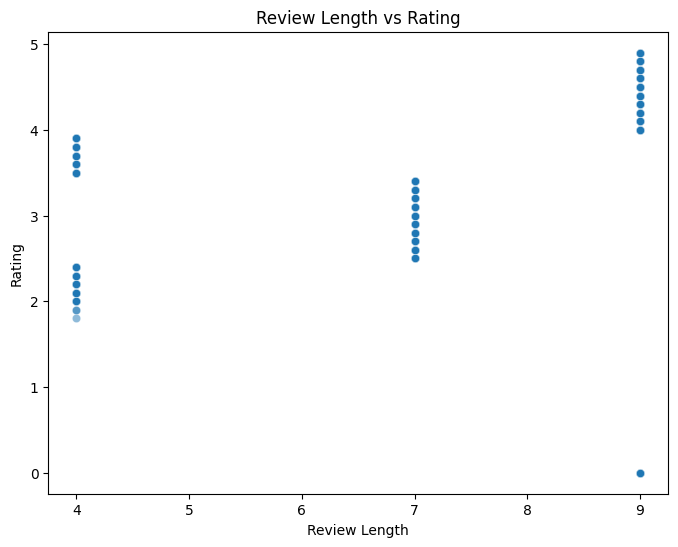

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Review_Length", y="Aggregate rating", data=df, alpha=0.5)
plt.title("Review Length vs Rating")
plt.xlabel("Review Length")
plt.ylabel("Rating")
plt.show()